# Pseudo random generator

In [1]:
from copy import deepcopy
from random import randrange
import string

def vigenere_key_generator(secret_key_size: int) -> str:
    n = len(string.ascii_lowercase)
    secret_key = ''
    while len(secret_key) < secret_key_size:
        secret_key += string.ascii_lowercase[randrange(n)]
    return secret_key


def shift_letter(letter: str, shiftby: str, forward: bool=True) -> str:
    n = len(string.ascii_lowercase)
    
    letter_int = ord(letter) - 97
    shiftby_int = ord(shiftby) - 97
    
    if forward:
        return string.ascii_lowercase[(letter_int+shiftby_int)%n]
    else:
        return string.ascii_lowercase[(letter_int-shiftby_int)%n]


def vigenere_encrypt_decrypt(message: str, secret_key: str, encrypt:bool = True) -> str:
    key_len = len(secret_key)
    
    encoded = ''
    for i, letter in enumerate(message):
        if letter != " ":
            encoded += shift_letter(letter, secret_key[i%key_len], forward=encrypt)
        else:
            encoded += letter
    return encoded

In [3]:
message ='hey my name is crypto'
secret_key= vigenere_key_generator(len(message))
cipher_text = vigenere_encrypt_decrypt(message,secret_key)

print(f"message : {message}, secret key : {secret_key} , cipher text : {cipher_text}")

message : hey my name is crypto, secret key : jyhfytuzvqpdvoeowhnaj , cipher text : qcf kr mvct dg qnfctx


using the one time pad with binary 

In [6]:
message = "011010110101001010101001110101"
secret_key  = "".join([str(randrange(2)) for _ in range(len(message))])
# for the cipher text we'll use the XOR operation 
cipher_text = "".join([str((int(s)+int(m))%2) for s , m in zip(secret_key,message)])


print(f"message : {message} \nsecret key : {secret_key}\ncipher text : {cipher_text}")

message : 011010110101001010101001110101 
secret key : 001010101110110100011001110010
cipher text : 010000011011111110110000000111


#     Coding the Linear Congruentiel Generator 


In [15]:
# on va définir les nombre a,c et m
a=1664525
c= 1013904223
m = 2**32

def LCG(x0,a,c,m):
    return (x0*a +c) %m
# X0 c'est le seed (first value)

In [33]:
X0  = 155
l = []
xn =  X0
for _ in range(100000): 
    xn = LCG(xn,a,c,m)
    l.append(xn/m)
    #on a déviser sur m juste pour avoir des valeur entre 0 et 1 (scalling)

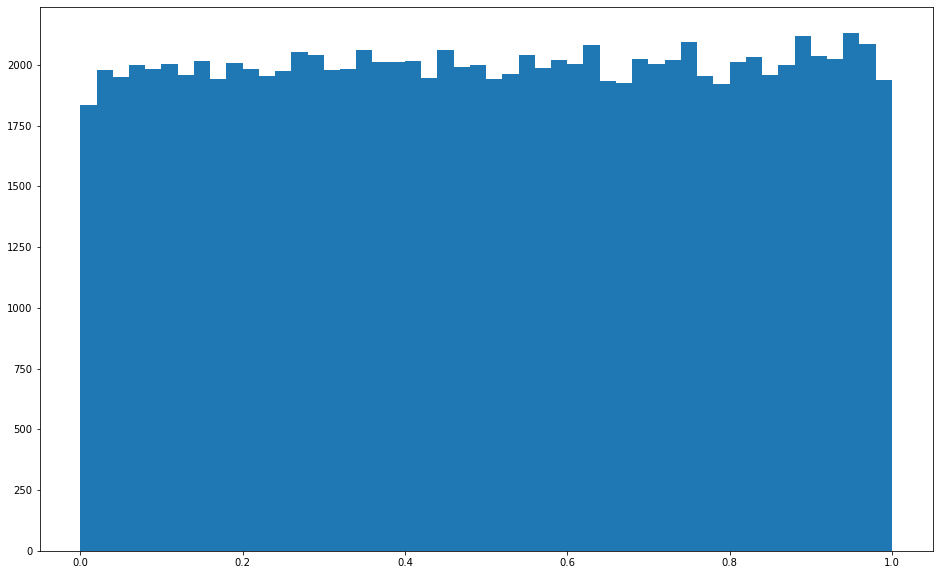

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (16,10))
plt.hist(l,bins=50)
plt.show()

[0.9999681781046093,
 0.9998689170461148,
 0.9999229409731925,
 0.9998302552849054,
 0.9998247446492314,
 0.9998387915547937,
 0.9998435990419239,
 0.9998274161480367,
 0.9998710625804961,
 0.9998144544661045,
 0.9998218710534275,
 0.9999890811741352,
 0.9999009883031249,
 0.9999788084533066,
 0.9998780752066523]

In [45]:
from random import seed
def PRNG(s,l): 
    seed(s)
    prng = []
    for _ in range(l): 
        prng.append(randrange(2))
    return ''.join([str(n) for n in prng])

In [56]:
s = 1245
#Alice
prng_alice = PRNG(s,10)
#Bob 
prng_bob = PRNG(s,10)

print(f"PRNG of alice is : {prng_alice} and the one for bob is : {prng_bob}" )
assert prng_alice ==prng_bob ,"the numbers are not the same"


PRNG of alice is : 0001110010 and the one for bob is : 0001110010


On va mtn générer des nombre random suivant une variable d'environnement du computer (température , fréquence , lumiére...) 

In [101]:
import secrets 
r = secrets.SystemRandom()
bin(r.getrandbits(1024))[2:]

'100110100010001101010010110011101111110111011101111001011000101110111010011001111111110101111011110011101010110101000100000110110100010100101101101110100010111010001101100111110101010000111110101011001011101010000101001000001111111010011001101111110001010100111000110111001010000000011100111000001111111001101101010000011010000011010010000110100010010101110000110111111001111010111100100010100000011010000001101101110111101011110011010110011100101001110101101010101101000101101101010000111010101011000100011010101100100011001010000000101001100000111101111010000000000010111100001101011101110101110101011100111011111111100010101110101100011011101100101010101001001101010000000011001100011010110010010110011110000111001111000111101100011000011110111101010010100000110001001001110000001000111111110100101101010000000001100011011001100011111000001010111001010010011111110001111111001111100001100110011100100100010011000011011101110010101111010001010111111001011000110010100011010001110000001100011010111

In [111]:
for i in range(1,128): 
    b = i.to_bytes(1,byteorder='big')
    print(f"integer = {i} hex={hex(i)} bytes = {b} decoded = {b.decode(encoding='UTF-8')}")

integer = 1 hex=0x1 bytes = b'\x01' decoded = 
integer = 2 hex=0x2 bytes = b'\x02' decoded = 
integer = 3 hex=0x3 bytes = b'\x03' decoded = 
integer = 4 hex=0x4 bytes = b'\x04' decoded = 
integer = 5 hex=0x5 bytes = b'\x05' decoded = 
integer = 6 hex=0x6 bytes = b'\x06' decoded = 
integer = 7 hex=0x7 bytes = b'\x07' decoded = 
integer = 8 hex=0x8 bytes = b'\x08' decoded = 
integer = 9 hex=0x9 bytes = b'\t' decoded = 	
integer = 10 hex=0xa bytes = b'\n' decoded = 

integer = 11 hex=0xb bytes = b'\x0b' decoded = 
integer = 12 hex=0xc bytes = b'\x0c' decoded = 
integer = 13 hex=0xd bytes = b'\r' decoded = 
integer = 14 hex=0xe bytes = b'\x0e' decoded = 
integer = 15 hex=0xf bytes = b'\x0f' decoded = 
integer = 16 hex=0x10 bytes = b'\x10' decoded = 
integer = 17 hex=0x11 bytes = b'\x11' decoded = 
integer = 18 hex=0x12 bytes = b'\x12' decoded = 
integer = 19 hex=0x13 bytes = b'\x13' decoded = 
integer = 20 hex=0x14 bytes = b'\x14' decoded = 
integer = 21 hex=0x15 bytes = b

In [124]:
x = int("e3999e",16)
x_b = x.to_bytes(4,byteorder="big")
dec_char = x_b.decode(encoding="UTF-8")
print(x,x_b,dec_char)

14915998 b'\x00\xe3\x99\x9e'  㙞


In [5]:
from crypto import bytes_to_hex,bytes_to_bin

message = b"hello world"
msg_bin = bytes_to_bin(message)[2:]
msg_hex = bytes_to_hex(message)[2:]
print(msg_bin)
print(msg_hex)

0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100
68656c6c6f20776f726c64


In [12]:
len(message*8)

88

In [ ]:
class Party: 
    def __init__(self,name,state): 
        self.name = name 
        self.state  = state
    def encrypt_decrypt(self,message,encrypt=True):
            
        